# ClusterLogic Model

## Aim

The primary aim of the ClusterLogic Model project is to develop a robust customer segmentation tool that leverages data analytics and machine learning techniques to categorize customers into distinct groups based on their purchasing behavior, preferences, and demographic characteristics. By achieving this aim, the project seeks to:

- **Enhance Marketing Strategies**: Enable businesses to tailor their marketing efforts to specific customer segments, resulting in more effective and personalized campaigns.
- **Improve Customer Understanding**: Provide insights into customer behavior and preferences, allowing businesses to better understand their target audience.
- **Optimize Resource Allocation**: Help businesses allocate resources more efficiently by focusing on high-value customer segments.
- **Drive Business Growth**: Facilitate data-driven decision-making to enhance customer satisfaction, loyalty, and ultimately increase sales and profitability.
- **Foster Data-Driven Culture**: Encourage organizations to adopt data-driven approaches for their marketing and customer relationship management efforts, leading to improved overall performance.

## Brief Explanation

The ClusterLogic Model project aims to develop a customer segmentation tool that leverages data analytics and machine learning to categorize customers based on their purchasing behavior and demographic characteristics. The primary objective is to enhance marketing strategies by allowing businesses to tailor their campaigns for specific customer segments, leading to more effective and personalized outreach. Additionally, the project seeks to improve customer understanding by providing valuable insights into preferences and behaviors, which can help organizations better connect with their target audience. 

By optimizing resource allocation and focusing on high-value segments, businesses can drive growth through data-driven decision-making that enhances customer satisfaction and loyalty. Ultimately, Customer Clust aspires to foster a data-driven culture within organizations, empowering them with actionable insights that significantly impact their success in the marketplace.

## 1. **Install Required Libraries**: 

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 2.**Data Collection**: 
   - Collect data from various sources, such as sales records, customer feedback, and demographic information. A sample dataset can be found on platforms like Kaggle.


In [2]:
import pandas as pd

# Load Data
data = pd.read_csv(r'C:\Users\ASUS\Downloads\Mall_Customers.csv')

# Display the first few rows of the dataset
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## 3.**Data Preprocessing**: 
   - Clean and preprocess the data to handle missing values, outliers, and categorical variables.


In [3]:
# Check for missing values
print(data.isnull().sum())

# Select relevant features for segmentation
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Display the selected features
print(X.describe())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


## 4. **Data Normalization**
Next, we’ll normalize the data to ensure all features are on the same scale, which is crucial for distance-based algorithms like K-means..


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print(X_scaled[:5])  # Show the first five rows of scaled data

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


## 5. **Determine the Optimal Number of Clusters**
We will use the Elbow Method to find the optimal number of clusters for our K-means algorithm.

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

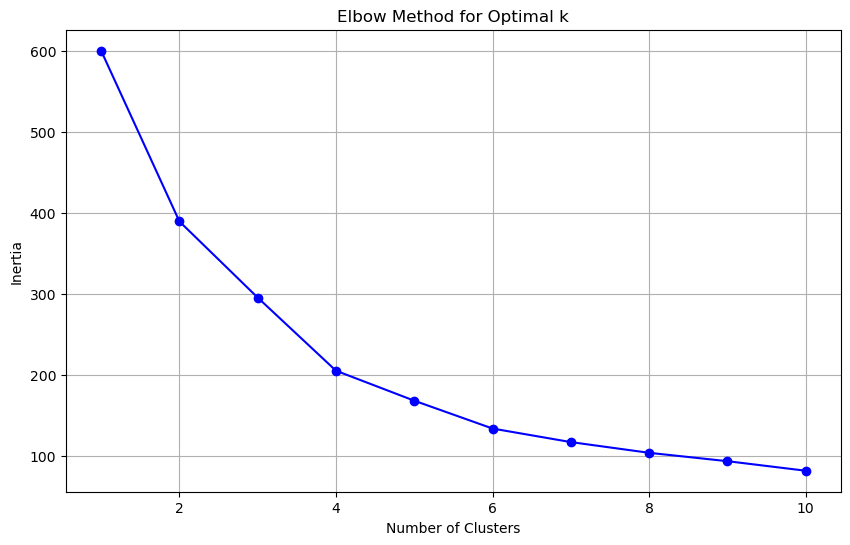

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Determine the optimal number of clusters (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

## 6. **Fit K-means Model**
Now we will fit the K-means model using the optimal number of clusters determined in the previous step.

In [7]:
from sklearn.cluster import KMeans

# Replace with the optimal k found from the elbow method (let’s assume it's 4 for this example)
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['Cluster'] = clusters

# Display the updated data with cluster labels
print(data.head())

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


## 7. **Visualization**: 
   - Visualize the segments using plots and graphs for better understanding.

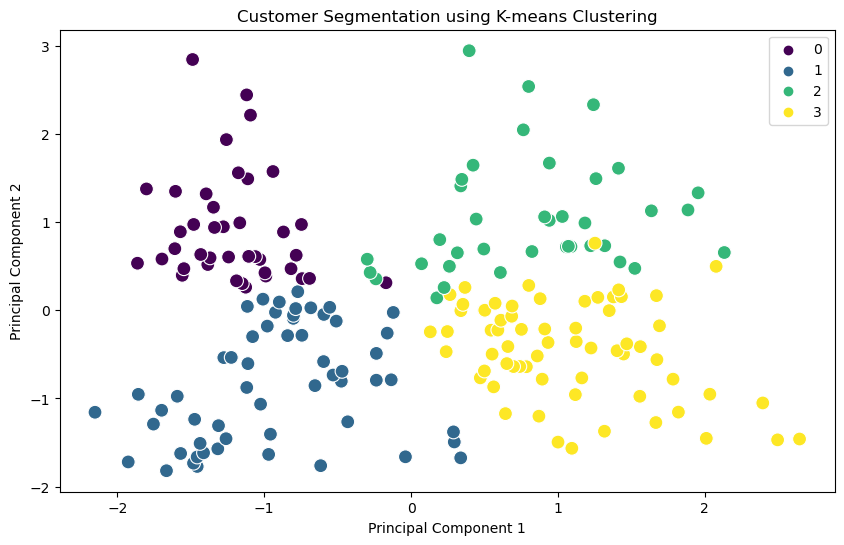

In [8]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## 8. **Deployment**: 
   - Deploy the tool using a web framework like Flask or Django for easy access and use.


In [9]:
# Analyze Cluster Characteristics
for i in range(optimal_k):
    print(f"\nCluster {i} characteristics:")
    print(data[data['Cluster'] == i].describe())


Cluster 0 characteristics:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    40.00000  40.000000           40.000000               40.000000   
mean    161.02500  32.875000           86.100000               81.525000   
std      23.33863   3.857643           16.339036                9.999968   
min     123.00000  27.000000           69.000000               58.000000   
25%     141.50000  30.000000           74.750000               74.000000   
50%     161.00000  32.000000           78.500000               83.000000   
75%     180.50000  36.000000           94.000000               90.000000   
max     200.00000  40.000000          137.000000               97.000000   

       Cluster  
count     40.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1 characteristics:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   57.000000  57.000000  

In [10]:
# Save the resulting data with clusters
data.to_csv('customer_segments.csv', index=False)

## Conclusion

By following the steps outlined in this project,we created a customer segmentation tool using K-means clustering in Python. The tool will help businesses better understand their customers and optimize their marketing strategies based on the segments identified. we can further explore the dataset, experiment with different clustering algorithms, or apply this approach to other datasets to enhance the analytical capabilities.